In [ ]:
# Finding insides from AirBnB in Berlin

In this project I used the [Cross Industry Process](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for Data Mining on the [Berlin AirBnB dataset](http://insideairbnb.com/get-the-data.html). I hope this project will give you some valuable insides for Berlin.

In [ ]:
## Business Understanding


In [ ]:
## Data Understanding

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import helperLibrary

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

ModuleNotFoundError: No module named 'helperLibrary'

In [32]:
listings = pd.read_csv('data/listings.csv', low_memory=False)
# calendar = pd.read_csv('./calendar.csv')

In [37]:
listings.shape

(24586, 106)

In [ ]:
# Checking the shape of the datasets
listings.shape
listings.head()
print listings.isnull().sum()

In [35]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.458600e+04,2.458600e+04,0.0,0.0,0.0,2.458600e+04,0.0,24558.000000,24558.000000,24586.000000,...,19991.000000,20008.000000,19992.000000,19989.000000,0.0,24586.000000,24586.000000,24586.000000,24586.000000,20505.000000
mean,2.032621e+07,2.019111e+13,NaN,NaN,NaN,7.157526e+07,NaN,3.289763,3.289763,52.510135,...,9.732630,9.745402,9.593037,9.410326,NaN,2.244692,1.287359,0.704344,0.133125,1.124612
std,1.154622e+07,0.000000e+00,NaN,NaN,NaN,8.019021e+07,NaN,29.712178,29.712178,0.031351,...,0.689154,0.689483,0.728482,0.848326,NaN,4.751699,3.918588,1.081880,2.100401,1.558517
min,1.944000e+03,2.019111e+13,NaN,NaN,NaN,2.058000e+03,NaN,0.000000,0.000000,52.345800,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.018156e+07,2.019111e+13,NaN,NaN,NaN,1.063757e+07,NaN,1.000000,1.000000,52.489260,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,2.049361e+07,2.019111e+13,NaN,NaN,NaN,3.795708e+07,NaN,1.000000,1.000000,52.509520,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.500000
75%,3.030221e+07,2.019111e+13,NaN,NaN,NaN,1.098736e+08,NaN,2.000000,2.000000,52.532850,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.470000
max,4.008630e+07,2.019111e+13,NaN,NaN,NaN,3.089376e+08,NaN,1492.000000,1492.000000,52.656630,...,10.000000,10.000000,10.000000,10.000000,NaN,55.000000,55.000000,12.000000,43.000000,36.350000


In [42]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              51
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4081
Length: 106, dtype: int64

In [44]:
#Provide a set of column name that have more than 75% if their values missing.
listings.columns[listings.isnull().mean() > 0.75]

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'square_feet', 'weekly_price', 'monthly_price', 'license',
       'jurisdiction_names'],
      dtype='object')

In [46]:
listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [47]:
pd.options.display.max_columns = listings.shape[1]
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.458600e+04,2.458600e+04,0.0,0.0,0.0,2.458600e+04,0.0,24558.000000,24558.000000,24586.000000,24586.000000,24586.000000,24564.000000,24559.000000,24549.000000,429.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,24586.000000,20035.000000,20009.000000,20012.000000,19991.000000,20008.000000,19992.000000,19989.000000,0.0,24586.000000,24586.000000,24586.000000,24586.000000,20505.000000
mean,2.032621e+07,2.019111e+13,NaN,NaN,NaN,7.157526e+07,NaN,3.289763,3.289763,52.510135,13.405700,2.678964,1.100961,1.160959,1.618396,497.328671,1.363866,7.265436,599.071829,7.144432,7.644961,609.708574,613.267429,7.348483,611.909359,5.148092,11.696697,20.118238,72.559261,21.305458,7.862645,94.629798,9.684592,9.334399,9.732630,9.745402,9.593037,9.410326,NaN,2.244692,1.287359,0.704344,0.133125,1.124612
std,1.154622e+07,0.000000e+00,NaN,NaN,NaN,8.019021e+07,NaN,29.712178,29.712178,0.031351,0.059172,1.566752,0.347030,0.670445,1.213436,519.394221,1.544577,28.363899,633.189630,28.283096,28.591579,655.084510,668.431587,28.399382,668.242624,8.776408,17.770353,28.727328,114.967819,44.508515,15.721510,7.597699,0.736754,1.026027,0.689154,0.689483,0.728482,0.848326,NaN,4.751699,3.918588,1.081880,2.100401,1.558517
min,1.944000e+03,2.019111e+13,NaN,NaN,NaN,2.058000e+03,NaN,0.000000,0.000000,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.018156e+07,2.019111e+13,NaN,NaN,NaN,1.063757e+07,NaN,1.000000,1.000000,52.489260,13.374753,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,20.000000,2.000000,2.000000,20.000000,21.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,2.049361e+07,2.019111e+13,NaN,NaN,NaN,3.795708e+07,NaN,1.000000,1.000000,52.509520,13.416305,2.000000,1.000000,1.000000,1.000000,431.000000,1.000000,3.000000,1098.500000,2.000000,3.000000,1124.000000,1124.000000,3.000000,1124.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.500000
75%,3.030221e+07,2.019111e+13,NaN,NaN,NaN,1.098736e+08,NaN,2.000000,2.000000,52.532850,13.439530,3.000000,1.000000,1.000000,2.000000,753.000000,1.000000,4.000000,1125.000000,4.000000,5.000000,1125.000000,1125.000000,4.000000,1125.000000,8.000000,19.000000,40.000000,98.000000,19.000000,8.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.470000
max,4.008630e+07,2.019111e+13,NaN,NaN,NaN,3.089376e+08,NaN,1492.000000,1492.000000,52.656630,13.758420,16.000000,8.500000,12.000000,22.000000,4639.000000,200.000000,1124.000000,50000.000000,112

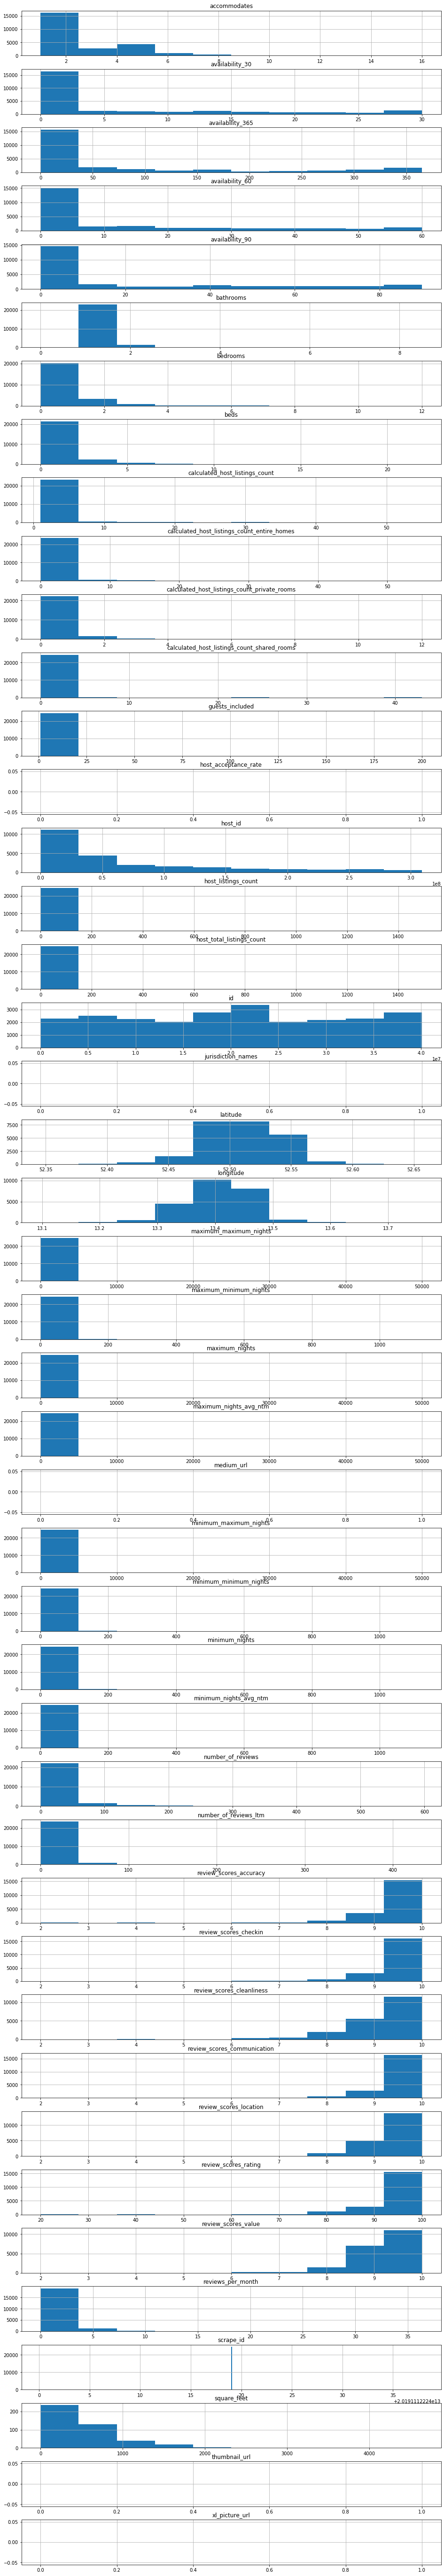

In [51]:
listings.hist(figsize=(16,100),layout=(44,1));

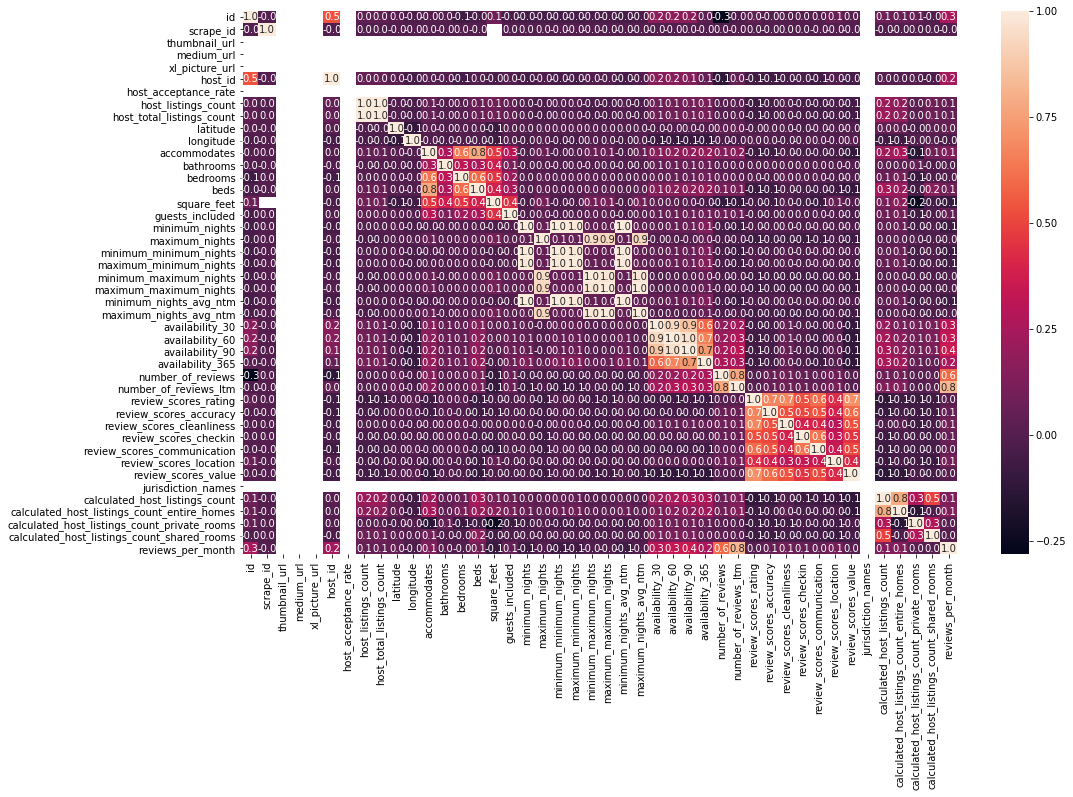

In [53]:
plt.figure(figsize=(16,10))
sns.heatmap(listings.corr(), annot=True, fmt='.1f')

In [55]:
showmissing(listings)

NameError: name 'showmissing' is not defined